In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import dates, colors
from matplotlib.ticker import ScalarFormatter
import scipy.stats
import datetime

from astropy.visualization import hist
# import seaborn as sns
# sns.set_context("paper")
# plt.rcParams['xtick.direction'] = "in"
# plt.rcParams['ytick.direction'] = "in"
# plt.rcParams['xtick.minor.visible'] = True
# plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['font.family'] = 'Helvetica'
# cmap_paper = "viridis"

In [ ]:
cmap_paper = "viridis"

In [ ]:
vlf_stats = pd.read_csv("vlf_stats_results_new.csv")

In [ ]:
vlf_flares.drop(np.where(vlf_flares["event_starttime"].isin(events_to_remove))[0], inplace=True)

In [ ]:
vlf_stats.drop(np.where(vlf_stats["start_time_goes"].isin(["2017-04-02 07:50:00"]))[0], inplace=True)

In [ ]:
vlf_stats.keys()

## Make plots!

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(vlf_stats["peak_flare_gl-bg"], vlf_stats["abs_vlf_db"], 
                c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm(), 
                cmap=cmap_paper)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("GOES 1-8$\mathrm{\AA}$ X-ray peak (Wm$^{-2}$)")
ax.set_ylabel("VLF amplitude excess (dB)")

ax.yaxis.set_major_formatter(ScalarFormatter())
# cbar = plt.colorbar(im)
# cbar.set_label("GOES 1-8$\mathrm{\AA}$ X-ray peak (Wm$^{-2}$)")
cc = scipy.stats.spearmanr(vlf_stats["peak_flare_gl-bg"], vlf_stats["abs_vlf_db"])
print(cc)
ax.text(0.85, 0.06, "C.C. {:.2f}".format(round(cc.correlation, 2)), transform=ax.transAxes)

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(vlf_stats["peak_flare_gs-bg"], vlf_stats["abs_vlf_db"], 
                c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm(), 
                cmap=cmap_paper)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("GOES 0.5-4$\mathrm{\AA}$ X-ray peak (Wm$^{-2}$)")
ax.set_ylabel("VLF amplitude excess (dB)")

ax.yaxis.set_major_formatter(ScalarFormatter())
# cbar = plt.colorbar(im)
# cbar.set_label("GOES 0.5-4$\mathrm{\AA}$ X-ray peak (Wm$^{-2}$)")
cc = scipy.stats.spearmanr(vlf_stats["peak_flare_gs-bg"], vlf_stats["abs_vlf_db"])
print(cc)
ax.text(0.85, 0.06, "C.C. {:.2f}".format(round(cc.correlation, 2)), transform=ax.transAxes)

In [2]:
from sunpy import timeseries as ts
goes = ts.TimeSeries("/Users/laurahayes/QPP/stats_study/TEBBS/goes_rawdata/go1320160514.fits")
gl = goes.to_dataframe()["xrsb"]

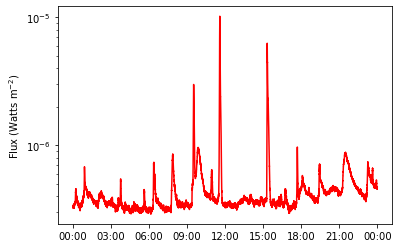

In [5]:
plt.plot(gl, color="r")
plt.yscale("log")
ax = plt.gca()
ax.set_ylabel("Flux (Watts m$^{-2}$)")
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))

### Background plots

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(pd.to_datetime(vlf_stats["start_time_goes"]), vlf_stats["background_sid_db"], 
            c=vlf_stats["max_vlf_db"])

In [ ]:
fig, ax = plt.subplots()
plt.scatter(vlf_stats["background_sid_db"], vlf_stats["abs_vlf_db"], 
            c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm())
plt.xlabel("Background VLF")
plt.ylabel("Abs VLF amp")
plt.yscale("log")

## Time Delay

In [ ]:
fig, ax = plt.subplots()
ax.scatter(vlf_stats["peak_flare_gl"], vlf_stats["dt_value_gl"]/60, alpha=0.5, color="r")
ax.scatter(vlf_stats["peak_flare_gl"], vlf_stats["dt_value_gs"]/60, alpha=0.5, color="b")
ax.axhline(0)
ax.set_xscale("log")
ax.set_ylim(-10, 20)

In [ ]:
vlf_stats[vlf_stats["dt_value_gs"]<0][["start_time_goes", "dt_value_gs", "goes_class"]]

In [ ]:
fig, ax = plt.subplots()
_, bins, _ = hist(vlf_stats["dt_value_gl"]/60, bins=40, alpha=0.5, color="r", label="1-8$\mathrm{\AA}$")
_ = hist(vlf_stats["dt_value_gs"]/60, bins=bins, alpha=0.5, color="b", label="0.5-4$\mathrm{\AA}$")
plt.axvline(0, color="k")
ax.tick_params(axis="y", direction="in")
ax.set_ylabel("Number of events")
ax.set_xlabel("Time delay (min)")
ax.legend()

In [ ]:
print(scipy.stats.spearmanr(vlf_stats["peak_flare_gl"], vlf_stats["dt_value_gl"]))
print(scipy.stats.spearmanr(vlf_stats["peak_flare_gs"], vlf_stats["dt_value_gs"]))